In [1]:
# Import the random module for general randomness
import random
# Seed the random number generator for reproducibility
random.seed(0)

# Import the numpy library for numerical operations
import numpy as np
# Seed the numpy random number generator for reproducibility
np.random.seed(0)

# Import the tensorflow library for deep learning
import tensorflow as tf
# Set the global seed for tensorflow operations for reproducibility
tf.random.set_seed(0)

In [2]:
# Import the Keras API from TensorFlow for building neural networks
from tensorflow import keras

In [3]:
# Import specific layers for building the Convolutional Neural Network (CNN)
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , BatchNormalization , Dropout , Activation
# Import the CIFAR-10 dataset, a common benchmark for image classification
from keras.datasets import cifar10
# Import the Sequential model API, which is a linear stack of layers
from keras.models import Sequential
# Import EarlyStopping callback to prevent overfitting during training
from keras.callbacks import EarlyStopping
# Import metrics for model evaluation, specifically confusion matrix and classification report
from sklearn.metrics import confusion_matrix , classification_report
# Import matplotlib for plotting graphs and images
import matplotlib.pyplot as plt
# Import seaborn for enhanced data visualization
import seaborn as sns
# Set matplotlib to display plots directly in the notebook
%matplotlib inline

In [4]:
# Load the CIFAR-10 dataset, splitting it into training and testing sets
# X_train, y_train are training images and labels
# X_test, y_test are testing images and labels
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
# Print the shape of the training images (number of samples, height, width, channels)
print(X_train.shape)
# Print the shape of the training labels (number of samples, 1)
print(y_train.shape)
# Print the shape of the testing images
print(X_test.shape)
# Print the shape of the testing labels
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# Define a dictionary to map numerical class labels to their corresponding names
data_class = {
    0:'airplane' ,
    1 :'automobile' ,
    2:'bird' ,
    3:'cat' ,
    4:'deer' ,
    5:'dog' ,
    6:'frog',
    7:'horse',
    8:'ship',
    9: 'truck'
}

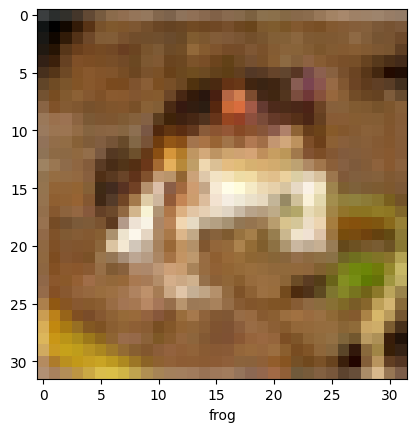

In [7]:
# Display the first image from the training set
plt.imshow(X_train[0])
# Set the x-axis label to the class name of the first image
plt.xlabel(data_class[y_train[0][0]])
# Show the plot
plt.show()

In [8]:
# Convert training images to float32 data type and normalize pixel values to range [0, 1]
# This is done by dividing by 255.0, as pixel values are typically from 0 to 255
X_train = X_train.astype('float32')/255.0
# Perform the same normalization for testing images
X_test = X_test.astype('float32')/255.0

In [9]:
# Initialize a Sequential model, which is a linear stack of layers
model = Sequential()

In [10]:
# Add the first convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and input shape
model.add(Conv2D(32 , (3,3) ,padding='same', input_shape=(32,32,3)))
# Add Batch Normalization to normalize the activations of the previous layer
model.add(BatchNormalization())
# Add a ReLU activation function
model.add(Activation('relu'))
# Add another convolutional layer with 32 filters and a 3x3 kernel
model.add(Conv2D(32 , (3,3) ,padding='same'))
# Add Batch Normalization
model.add(BatchNormalization())
# Add a ReLU activation function
model.add(Activation('relu'))
# Add a MaxPooling layer with a 2x2 pool size and stride of 2 to reduce spatial dimensions
model.add(MaxPooling2D((2,2),2))

# Add a third convolutional layer with 64 filters
model.add(Conv2D(64 , (3,3),padding='same'))
# Add Batch Normalization
model.add(BatchNormalization())
# Add a ReLU activation function
model.add(Activation('relu'))

# Add a fourth convolutional layer with 64 filters
model.add(Conv2D(64 , (3,3) ))
# Add Batch Normalization
model.add(BatchNormalization())
# Add a ReLU activation function
model.add(Activation('relu'))
# Add another MaxPooling layer
model.add(MaxPooling2D((2,2),2))

# Add a fifth convolutional layer with 128 filters and ReLU activation
model.add(Conv2D(128 , (3,3) , activation='relu',padding='same'))
# Add a sixth convolutional layer with 128 filters and ReLU activation
model.add(Conv2D(128 , (3,3) , activation='relu'))
# Add a final MaxPooling layer for convolutional blocks
model.add(MaxPooling2D((2,2),2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Flatten the output from the convolutional layers into a 1D vector
model.add(Flatten())
# Add a fully connected (Dense) layer with 128 units and ReLU activation
model.add(Dense(128,activation='relu'))
# Add a Dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))
# Add another fully connected layer with 64 units and ReLU activation
model.add(Dense(64,activation='relu'))
# Add the output layer with 10 units (for 10 classes in CIFAR-10) and softmax activation
# Softmax ensures the output probabilities sum to 1
model.add(Dense(10,activation='softmax'))

In [12]:
# Print a summary of the model architecture, including layer types, output shapes, and number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,346 (1.38 MB)

 Trainable params: 361,962 (1.38 MB)

 Non-trainable params: 384 (1.50 KB)

In [13]:
# Compile the model with the Adam optimizer, sparse categorical crossentropy loss function,
# and 'accuracy' as the metric to monitor during training
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Define an EarlyStopping callback to monitor 'val_loss'
# Training will stop if 'val_loss' does not improve for 4 consecutive epochs (patience=4)
# 'restore_best_weights=True' ensures that the model weights from the epoch with the best validation loss are restored
es = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

In [15]:
# Train the model using the training data (X_train, y_train) for 20 epochs
# A validation split of 0.3 means 30% of the training data will be used for validation
# The EarlyStopping callback 'es' is used to monitor training progress and prevent overfitting
history = model.fit(X_train,y_train,epochs=20,validation_split=0.3,callbacks=[es])

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.3030 - loss: 1.8535 - val_accuracy: 0.3315 - val_loss: 1.9011
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5373 - loss: 1.2883 - val_accuracy: 0.6020 - val_loss: 1.1286
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6336 - loss: 1.0518 - val_accuracy: 0.6146 - val_loss: 1.1408
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6868 - loss: 0.9112 - val_accuracy: 0.5863 - val_loss: 1.3462
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7224 - loss: 0.8049 - val_accuracy: 0.7194 - val_loss: 0.8276
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7492 - loss: 0.7231 - val_accuracy: 0.7317 - val_loss: 0.8230
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7724 - loss: 0.6636 - val_accuracy: 0.7417 - val_loss: 0.7673
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7917 - loss: 0.6031 

In [16]:
# Evaluate the trained model on the test dataset (X_test, y_test)
# This returns the test loss and test accuracy
test_loss, test_acc = model.evaluate(X_test,y_test)
# Print the testing accuracy
print("Testing accuracy : ", test_acc)
# Print the testing loss
print("Testing loss : ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7441 - loss: 0.7913
Testing accuracy :  0.7404000163078308
Testing loss :  0.7909265160560608


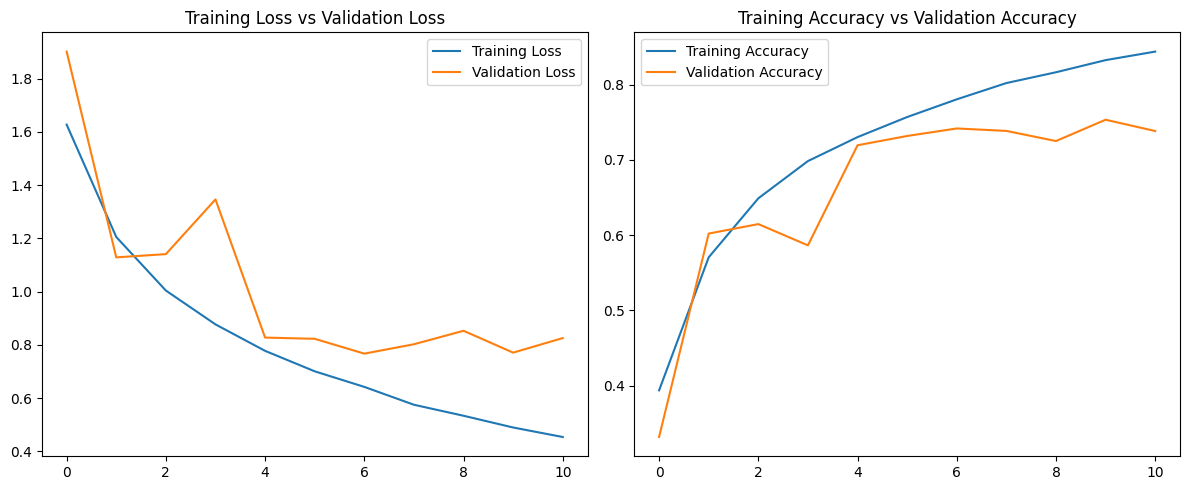

In [17]:
# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss on the first subplot (ax1)
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training Loss vs Validation Loss') # Set title for ax1
ax1.legend() # Display legend for ax1

# Plot training and validation accuracy on the second subplot (ax2)
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training Accuracy vs Validation Accuracy') # Set title for ax2
ax2.legend() # Display legend for ax2

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Show the plot
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1000
           1       0.77      0.95      0.85      1000
           2       0.62      0.62      0.62      1000
           3       0.58      0.59      0.59      1000
           4       0.71      0.63      0.67      1000
           5       0.79      0.58      0.67      1000
           6       0.77      0.81      0.79      1000
           7       0.77      0.78      0.77      1000
           8       0.80      0.87      0.83      1000
           9       0.88      0.79      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



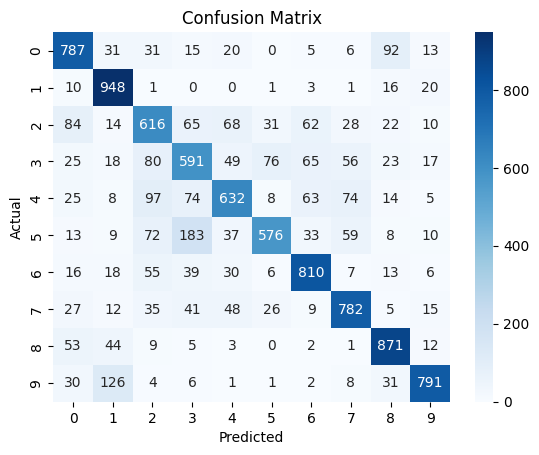

In [18]:
# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)
# Convert the predicted probabilities to class labels by taking the argmax along axis 1
y_pred = np.argmax(y_pred,axis=1)

# Print the classification report, which includes precision, recall, f1-score, and support for each class
print(classification_report(y_test,y_pred))

# Calculate the confusion matrix
matrix = confusion_matrix(y_test,y_pred)
# Create a heatmap of the confusion matrix using seaborn for better visualization
sns.heatmap(matrix,annot=True,fmt='d',cmap='Blues')
# Set the title of the plot
plt.title('Confusion Matrix')
# Set the x-axis label
plt.xlabel('Predicted')
# Set the y-axis label
plt.ylabel('Actual')
# Show the plot
plt.show()

In [19]:
# Make predictions on the test set again (or reuse previous y_pred if available)
y_pred_full = model.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_full = np.argmax(y_pred_full,axis=1)

# Flatten y_test to a 1D array for easier comparison
y_test_flat = y_test.reshape(-1)

# Find indices where predictions match actual labels (correctly classified)
correct_indices = np.where(y_pred_full == y_test_flat)[0]
# Find indices where predictions do not match actual labels (incorrectly classified)
incorrect_indices = np.where(y_pred_full != y_test_flat)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Number of correctly classified images: 7404
Number of incorrectly classified images: 2596


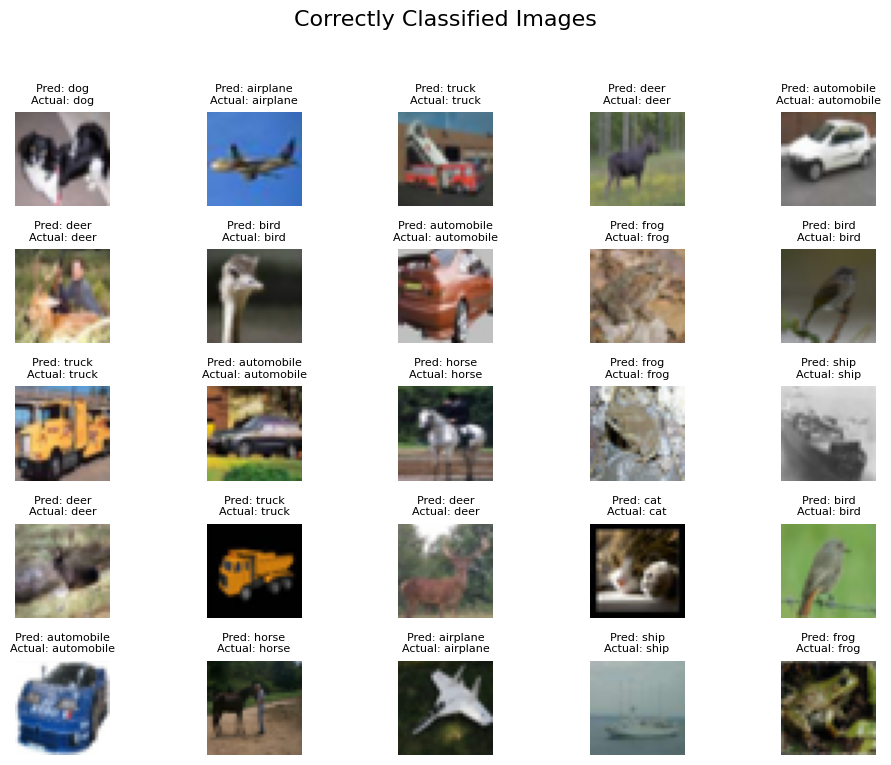

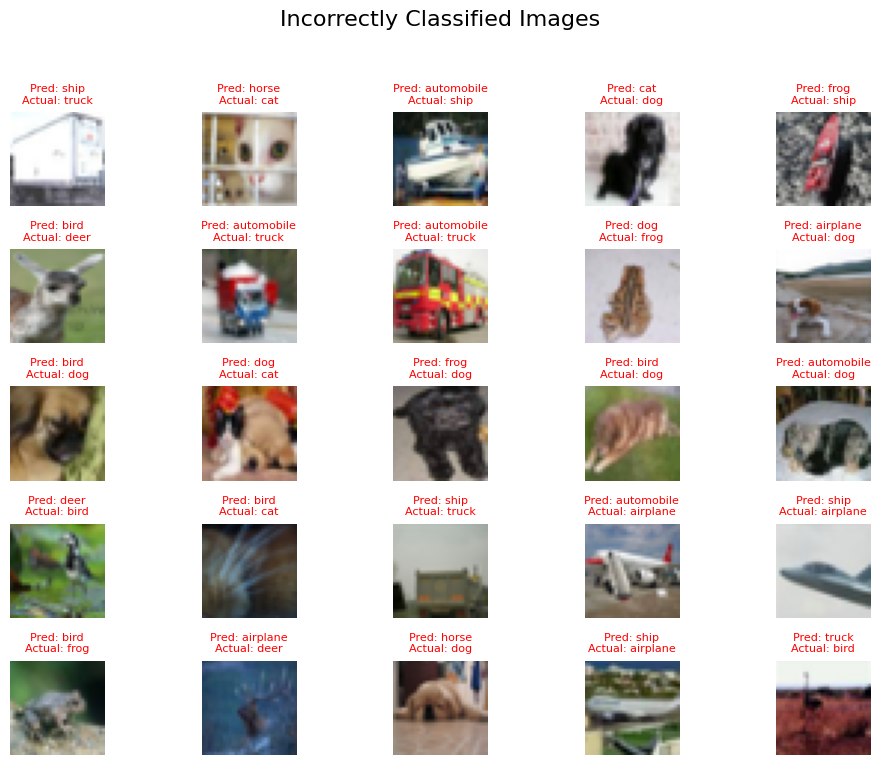

In [20]:
# Print the total number of correctly classified images
print(f"Number of correctly classified images: {len(correct_indices)}")
# Print the total number of incorrectly classified images
print(f"Number of incorrectly classified images: {len(incorrect_indices)}")

# Create a figure to display correctly classified images
plt.figure(figsize=(10, 8))
plt.suptitle("Correctly Classified Images", fontsize=16)
# Iterate through a sample of up to 25 correctly classified images
for i, correct in enumerate(random.sample(list(correct_indices), min(25, len(correct_indices)))):
    plt.subplot(5, 5, i + 1) # Create a 5x5 grid of subplots
    plt.imshow(X_test[correct].reshape(32,32,3), cmap='gray') # Display the image
    # Set the title with predicted and actual labels
    plt.title(f"Pred: {data_class[y_pred_full[correct]]}\nActual: {data_class[y_test[correct][0]]}", fontsize=8)
    plt.axis('off') # Turn off axis ticks and labels
# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Show the plot

# Create a figure to display incorrectly classified images
plt.figure(figsize=(10, 8))
plt.suptitle("Incorrectly Classified Images", fontsize=16)
# Iterate through a sample of up to 25 incorrectly classified images
for i, incorrect in enumerate(random.sample(list(incorrect_indices), min(25, len(incorrect_indices)))):
    plt.subplot(5, 5, i + 1) # Create a 5x5 grid of subplots
    plt.imshow(X_test[incorrect].reshape(32,32,3), cmap='gray') # Display the image
    # Set the title with predicted and actual labels, highlighting incorrect prediction in red
    plt.title(f"Pred: {data_class[y_pred_full[incorrect]]}\nActual: {data_class[y_test[incorrect][0]]}", fontsize=8, color='red')
    plt.axis('off') # Turn off axis ticks and labels
# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Show the plot